# Purpose

Learning more about NN's with the MNIST challenge

## To do

~~Normalization of the data~~

Augmentation of the data

Implement early stopping

Add more layers

Try max pooling

~~Try dropout layer~~

~~Confusion matrix to find out what errors are made~~

In [10]:
#Import packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [11]:
#Load data
train0 = pd.read_csv('train.csv')
test0 = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [12]:
#Separate target from training set. No missing data
y_train = train0['label']
train1 = train0.drop(labels=['label'], inplace=False, axis = 1)

In [13]:
#Possibly augment the data

In [14]:
#Possibly normalize
scaler = StandardScaler()
train2 = scaler.fit_transform(train1)
test1 = scaler.fit_transform(test0)

In [15]:
#Split the training data into test and validation set
X_train, X_val, y_train, y_val = train_test_split(train2, y_train, test_size=0.2, random_state=42)
X_train_reshaped = np.reshape(X_train, (-1, 28, 28, 1))
X_val_reshaped = np.reshape(X_val, (-1, 28, 28, 1))
test1_reshaped = np.reshape(test1, (-1, 28, 28, 1))


In [16]:
#Multinomal logistic regression as a baseline, accuracy on validation set ~0.9
#clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

In [17]:
#Score the logistic regression model
#clf.score(X_val,y_val)

In [18]:
#Building a convolutional neural network
model = Sequential()


# First Conv2D layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(Dropout(0.5))

# Second Conv2D layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Dropout(0.5))

# Optional: Add a max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 dropout_2 (Dropout)         (None, 26, 26, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 dropout_3 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                      

In [19]:
#Fit the model
history = model.fit(X_train_reshaped, y_train, epochs=10, 
                    validation_data=(X_val_reshaped, y_val))

Epoch 1/10
1050/1050 [==============================] - 39s 37ms/step - loss: 0.2153 - accuracy: 0.9351 - val_loss: 0.1215 - val_accuracy: 0.9748
Epoch 2/10
1050/1050 [==============================] - 65s 62ms/step - loss: 0.0784 - accuracy: 0.9769 - val_loss: 0.0848 - val_accuracy: 0.9819
Epoch 3/10
1050/1050 [==============================] - 38s 36ms/step - loss: 0.0627 - accuracy: 0.9795 - val_loss: 0.0731 - val_accuracy: 0.9825
Epoch 4/10
1050/1050 [==============================] - 36s 34ms/step - loss: 0.0502 - accuracy: 0.9839 - val_loss: 0.0502 - val_accuracy: 0.9854
Epoch 5/10
1050/1050 [==============================] - 36s 34ms/step - loss: 0.0451 - accuracy: 0.9853 - val_loss: 0.0582 - val_accuracy: 0.9812
Epoch 6/10
1050/1050 [==============================] - 37s 35ms/step - loss: 0.0392 - accuracy: 0.9867 - val_loss: 0.0562 - val_accuracy: 0.9846
Epoch 7/10
1050/1050 [==============================] - 35s 33ms/step - loss: 0.0351 - accuracy: 0.9883 - val_loss: 0.0462 -

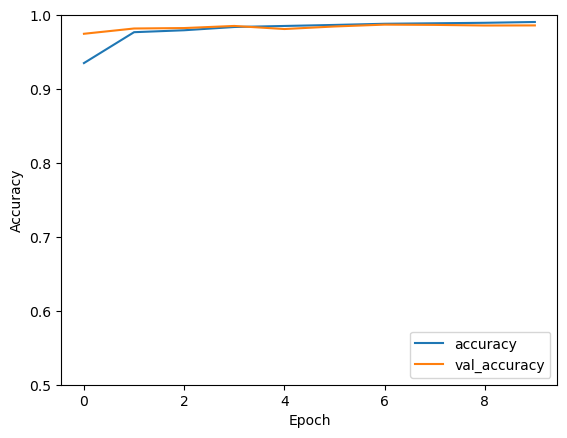

Validation Loss: 0.0463
Validation Accuracy: 98.61%


In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

loss, accuracy = model.evaluate(X_val_reshaped, y_val, verbose=0)

print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy*100:.2f}%")

263/263 [==============================] - 1s 5ms/step


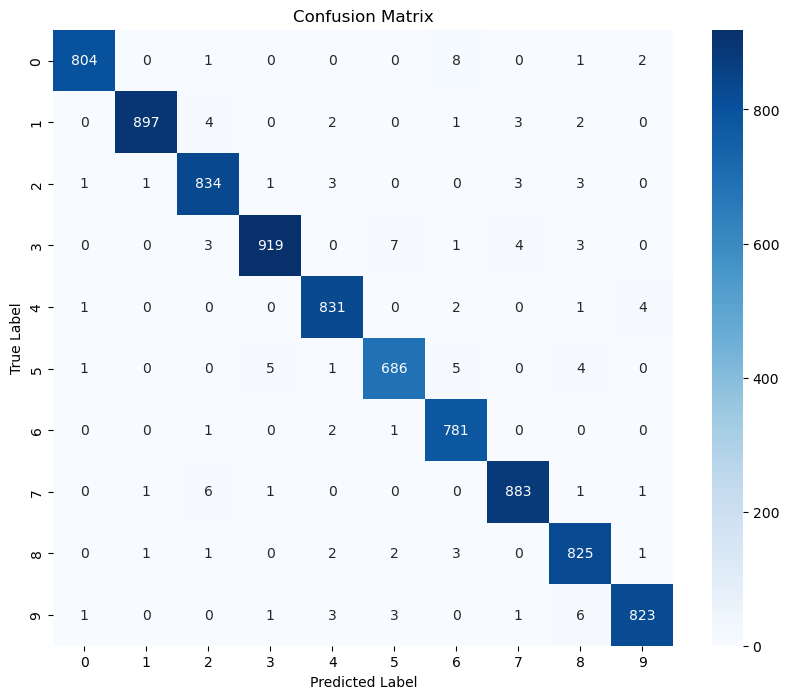

In [21]:
#Confusion matrix
probabilities_val = model.predict(X_val_reshaped)
predicted_val_labels = np.argmax(probabilities_val, axis=1)
cm = confusion_matrix(y_val, predicted_val_labels)

# Display using Seaborn's heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#8's and 7's are most often mistaken, intersstingly enough both for 2's. If we look to expand the dataset,
#that is probably where we should focus our efforts.

In [22]:
#Predictions for test set
probabilities_test = model.predict(test1_reshaped)
predicted_labels_test = np.argmax(probabilities_test, axis=1)

875/875 [==============================] - 4s 5ms/step


In [23]:
image_ids = np.arange(1, len(predicted_labels_test) + 1)
df = pd.DataFrame({'ImageId': image_ids, 'Label': predicted_labels_test})

In [25]:
df.to_csv('./Submissions/002_submission.csv', index=False, header=True)

## Perfomance

### 000
Comment: CNN, two layers

Score: 0.97107

### 001
Comment: CNN, added dropout layer

Score: 0.97389

### 002
Comment: CNN, two conv2D layers with dropout (50%), and a max pooling layer after the second

Score: 0.98421